In [273]:
%run -i ./python/bpsk_rayleigh_3path.py

# BER Simulation for BPSK for 3-Path Rayleigh Fading under Section, Equal Gain, and Max Ratio Combining Methods

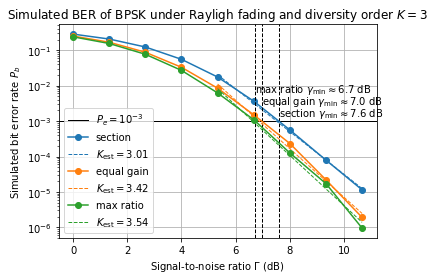

In [288]:
N       = 2**20                 # Number of symbols
K       = 3                     # Number of diversity branches
Ga_l    = np.logspace(0,2,16)   # Simulation SNR values
Ga_l_dB = 10*np.log10(Ga_l)
FIGNAME = "diversity_combining_methods.png"
Pe_MAX  = 10**(-3)              # Maximum BER to estimate Minimum SNR

fig, axs = plt.subplots()
axs.set_title(r"Simulated BER of BPSK under Rayligh fading and diversity order $K = {}$".format(K))
axs.set_xlabel(r"Signal-to-noise ratio $\Gamma$ (dB)")
axs.set_ylabel(r"Simulated bit error rate $P_b$")
axs.set_yscale("log")

# Annotate maximum Pe line
axs.axhline(Pe_MAX,color = "black",linestyle="-",
            linewidth=1,label="$P_e = 10^{{{:.0f}}}$".format(np.log10(Pe_MAX)))


for combiner_ix, combiner in enumerate(COMBINERS):
    # Compute BER rates
    Pe_l = BPSKRayleighDiversityBER(N,K,Ga_l,combiner)

    # Interpolation
    Pe_est = interp1d(Ga_l[l_interp],Pe_l[l_interp],
                      fill_value="extrapolate")
    

    # Estimate and annotate minimum SNR
    l_interp = (Pe_l > 0)
    if np.any(Pe_l < Pe_MAX):
        # Points to interpolate
        x = np.log10(Pe_l[l_interp])
        y = Ga_l_dB[l_interp]
        
        # Linear interpolator
        f = interp1d(x,y,fill_value="interpolate",kind="linear")
        
        # Interpolated estimate of minimum SNR
        Ga_min_est_dB = f(np.log10(Pe_MAX))
        axs.axvline(Ga_min_est_dB,color="black",linestyle="--",linewidth=1)
        annotation = r"{} $\gamma_\min \approx {:.1f}$ dB".format(
            combiner,Ga_min_est_dB)
        xy = (Ga_min_est_dB,Pe_MAX)
        xytext = (Ga_min_est_dB,Pe_MAX*10**(0.15 + .33*combiner_ix))
        axs.annotate(annotation,xy,xytext)


    # Plot BER curve
    l_plot = (Pe_l > 0)
    ber_curve = axs.plot(Ga_l_dB[l_plot],Pe_l[l_plot],"o-",label=combiner)


    # Estimate diversity order via linear regression
    l_regression = (Pe_l > 0) & (Ga_l_dB > 5)
    x = Ga_l_dB[l_regression]
    y = np.log10(Pe_l[l_regression])
    A = np.stack([np.ones_like(x),x],axis=1)
    a0, a1 = np.linalg.lstsq(A,y,rcond=None)[0]
    K_est = -a1 * 5 # Estimated diversity order

    # Plot linear regression line
    label = "$K_{{\mathrm{{est}}}} = {:.2f}$".format(K_est)
    axs.plot(x,np.power(10,a0 + a1*x),"--",
             color=ber_curve[0].get_color(),linewidth=1,label=label)

axs.legend()
fig.tight_layout()
fig.savefig("./plots/{}".format(FIGNAME))

# BER Simulation for BPSK for K-Path Rayleigh Fading under Section Combining Method

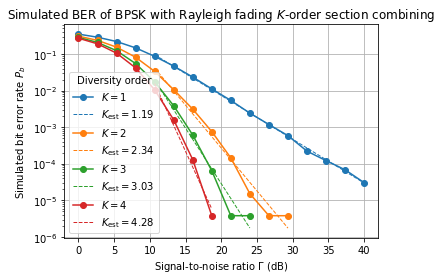

In [275]:
N        = 2**18                 # number of symbols
Ga_l     = np.logspace(0,2,16)   # SNR values
Ga_l_dB  = 20*np.log10(Ga_l)
COMBINER = "section"             # Possible values: {"section", "equal gain", "max ratio"}
FIGNAME  = "diversity_order.png"

fig, axs = plt.subplots()
for K in [1,2,3,4]:
    # Calculate symbol error rate (same as BER for BPSK)
    Pe_l = BPSKRayleighDiversityBER(N,K,Ga_l,COMBINER)
    
    # Plot BER curve
    l_plot = (Pe_l > 0)
    ber_curve = axs.plot(Ga_l_dB[l_plot],Pe_l[l_plot],marker="o",
                         label=r"$K = {}$".format(K))
    
    # Estimate diversity order via linear regression
    l_regression = (Pe_l > 0) & (Ga_l_dB > 10)
    x = Ga_l_dB[l_regression]
    y = np.log10(Pe_l[l_regression])
    A = np.stack([np.ones_like(x),x],axis=1)
    a0, a1 = np.linalg.lstsq(A,y,rcond=None)[0]
    K_est = -a1 * 10 # Estimated diversity order

    # Plot linear regression line
    label = "$K_{{\mathrm{{est}}}} = {:.2f}$".format(K_est)
    axs.plot(x,np.power(10,a0 + a1*x),"--",
             color=ber_curve[0].get_color(),linewidth=1,label=label)
    
axs.set_title(r"Simulated BER of BPSK with Rayleigh fading $K$-order {} combining".format(COMBINER))
axs.set_xlabel(r"Signal-to-noise ratio $\Gamma$ (dB)")
axs.set_ylabel(r"Simulated bit error rate $P_b$")
axs.set_yscale("log")
axs.legend(title = "Diversity order")
fig.tight_layout()
fig.savefig("./plots/{}".format(FIGNAME))

In [169]:
%run -i ./python/block_fading.py